### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [1]:
import pandas as pd

ci_df = pd.read_csv("./datasets/customer_invoice_data.csv")
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 컬럼명 변경

In [2]:
ci_df.columns = ['InvoiceID', 'ProductID', 'ProductName', 'Quantity', 'Date', 'Price', 'CustomerID', 'Country']
ci_df

,InvoiceID,ProductID,ProductName,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceID    541909 non-null  object 
 1   ProductID    541909 non-null  object 
 2   ProductName  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   Date         541909 non-null  object 
 5   Price        541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# 중복 행 검사
ci_df.duplicated().sum()

5268

In [5]:
# 중복 행 삭제
ci_df = ci_df.drop_duplicates()
ci_df.duplicated().sum()

0

### 결측치 검사

In [6]:
ci_df.isnull().sum()

InvoiceID           0
ProductID           0
ProductName      1454
Quantity            0
Date                0
Price               0
CustomerID     135037
Country             0
dtype: int64

### 결측치 제거
- 결측치가 있는 feature는 ProductName과 CustomerID이며 ProductName은 필요없는 feature임으로 삭제하고  
  CustomerID는 회원의 고유 번호로 대체를 하거나 채워넣을 수 없다 판단하여 결측치가 포함 된 행을 삭제

In [7]:
# ProductName feature 삭제
ci_df = ci_df.drop('ProductName', axis=1)
ci_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
# CustomerID가 결속치인 행 삭제
ci_df = ci_df[~ci_df['CustomerID'].isna()]
ci_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
ci_df.isnull().sum()

InvoiceID     0
ProductID     0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [10]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceID   401604 non-null  object 
 1   ProductID   401604 non-null  object 
 2   Quantity    401604 non-null  int64  
 3   Date        401604 non-null  object 
 4   Price       401604 non-null  float64
 5   CustomerID  401604 non-null  float64
 6   Country     401604 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [11]:
# 회원 아이디가 float64 타입으로 되어있어 int32타입으로 변경
ci_df.loc[:, 'CustomerID'] = ci_df['CustomerID'].astype('int32')
ci_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
# 나중에 Recency를 계산하기 위해 Data를 datetime으로 변경
ci_df.loc[:, 'Date'] = pd.to_datetime(ci_df['Date']).dt.date
ci_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,4,2011-12-09,4.15,12680.0,France


### 이상치 검사

In [13]:
ci_df['Quantity'].value_counts().sort_index()

Quantity
-80995    1
-74215    1
-9360     1
-3114     1
-2000     1
         ..
 4300     1
 4800     1
 12540    1
 74215    1
 80995    1
Name: count, Length: 436, dtype: int64

In [14]:
# Quantity가 0미만의 경우 환불에 대한 데이터라 판단하여 구매에 대한 데이터만 분석하기 위해 행 삭제
ci_df = ci_df[~(ci_df['Quantity'] <= 0)]
ci_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,4,2011-12-09,4.15,12680.0,France


In [15]:
# Quantity 정상치의 범위
import numpy as np

Q1 = ci_df.describe().T.loc['Quantity', '25%']
Q3 = ci_df.describe().T.loc['Quantity', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: -13.0 ~ 27.0
정상치 범위: 0 ~ 27.0


In [16]:
# Price 정상치의 범위
Q1 = ci_df.describe().T.loc['Price', '25%']
Q3 = ci_df.describe().T.loc['Price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: -2.5 ~ 7.5
정상치 범위: 0 ~ 7.5


In [17]:
# Price에 0이하의 값이 있는지 검사
ci_df[ci_df['Price'] <= 0]

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country
9302,537197,22841,1,2010-12-05,0.0,12647.0,Germany
33576,539263,22580,4,2010-12-16,0.0,16560.0,United Kingdom
40089,539722,22423,10,2010-12-21,0.0,14911.0,EIRE
47068,540372,22090,24,2011-01-06,0.0,13081.0,United Kingdom
47070,540372,22553,24,2011-01-06,0.0,13081.0,United Kingdom
56674,541109,22168,1,2011-01-13,0.0,15107.0,United Kingdom
86789,543599,84535B,16,2011-02-10,0.0,17560.0,United Kingdom
130188,547417,22062,36,2011-03-23,0.0,13239.0,United Kingdom
139453,548318,22055,5,2011-03-30,0.0,13113.0,United Kingdom
145208,548871,22162,2,2011-04-04,0.0,14410.0,United Kingdom


###  피드백 받은 부분
중앙값과 평균중 대체 값을 결정하는 과정에서 어떤것과의 차이가 더 적은지 보여주는게 좋다.

In [18]:
# Price에서 평균을 뺀 값의 절대값의 평균
(ci_df['Price'] - ci_df['Price'].describe()['mean']).abs().mean()

2.388600620511694

In [19]:
# Price에서 중앙값을 뺀 값의 절대값의 평균
(ci_df['Price'] - ci_df['Price'].describe()['50%']).abs().mean()

2.0729049224407476

In [20]:
# Price가 0인 행들의 값을 중앙값으로 변경하여 분석에 영향을 최소화 하도록 수정
median_pr = ci_df.groupby('ProductID')['Price'].median().to_dict()
display(ci_df[ci_df['ProductID'] == '10002'].describe().T)
median_pr

,count,mean,std,min,25%,50%,75%,max
Quantity,49.0,16.795918,2.552611e+01,1.00,4.00,12.00,12.00,120.00
Price,49.0,0.850000,6.730369e-16,0.85,0.85,0.85,0.85,0.85
CustomerID,49.0,14772.285714,1.944314e+03,12451.00,12754.00,14713.00,16701.00,18079.00


{'10002': 0.85,
 '10080': 0.39,
 '10120': 0.21,
 '10123C': 0.65,
 '10124A': 0.42,
 '10124G': 0.42,
 '10125': 0.85,
 '10133': 0.42,
 '10135': 1.25,
 '11001': 1.69,
 '15030': 0.29,
 '15034': 0.14,
 '15036': 0.83,
 '15039': 0.85,
 '15044A': 2.95,
 '15044B': 2.95,
 '15044C': 2.95,
 '15044D': 2.95,
 '15056BL': 5.95,
 '15056N': 5.95,
 '15056P': 5.95,
 '15058A': 7.95,
 '15058B': 7.95,
 '15058C': 7.95,
 '15060B': 3.75,
 '16008': 0.12,
 '16010': 0.12,
 '16011': 0.21,
 '16012': 0.21,
 '16014': 0.42,
 '16015': 0.5,
 '16016': 0.85,
 '16020C': 0.85,
 '16033': 0.12,
 '16043': 0.12,
 '16045': 0.04,
 '16046': 0.85,
 '16048': 0.12,
 '16049': 0.12,
 '16052': 0.305,
 '16054': 0.12,
 '16151A': 1.25,
 '16156L': 0.42,
 '16156S': 0.42,
 '16161G': 0.1,
 '16161M': 0.42,
 '16161P': 0.42,
 '16161U': 0.42,
 '16162L': 0.65,
 '16162M': 0.42,
 '16168M': 0.42,
 '16169E': 0.42,
 '16169K': 0.42,
 '16169M': 0.42,
 '16169N': 0.42,
 '16169P': 0.42,
 '16202A': 0.5,
 '16202B': 0.5,
 '16202E': 0.5,
 '16206B': 1.25,
 '16207A'

In [21]:
ci_df.loc[:, 'Price'] = ci_df.\
                    apply(lambda row: median_pr[row['ProductID']] if row['Price'] == 0 else row['Price'], axis=1)
ci_df[ci_df['Price'] <= 0]

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country


### RFM 구하기

In [22]:
# Recency 구하기 위해 가장 최근 날짜인 '2011-12-09'를 기준으로 계산
reference_date = pd.to_datetime('2011-12-09')

ci_df.loc[:, 'Date'] = (reference_date - pd.to_datetime(ci_df['Date'])).dt.days
display(ci_df)

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,6,373,2.55,17850.0,United Kingdom
1,536365,71053,6,373,3.39,17850.0,United Kingdom
2,536365,84406B,8,373,2.75,17850.0,United Kingdom
3,536365,84029G,6,373,3.39,17850.0,United Kingdom
4,536365,84029E,6,373,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,0,0.85,12680.0,France
541905,581587,22899,6,0,2.10,12680.0,France
541906,581587,23254,4,0,4.15,12680.0,France
541907,581587,23255,4,0,4.15,12680.0,France


In [23]:
# Recency
rfm_r = ci_df.groupby('CustomerID')['Date'].min().reset_index()
rfm_r.columns = ['CustomerID', 'Recency']

# Frequency
rfm_f = ci_df['CustomerID'].value_counts().reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']

# Monetary
rfm_m = ci_df.groupby('CustomerID')['Price'].sum().reset_index()
rfm_m.columns = ['CustomerID', 'Monetary']

rfm = pd.merge(rfm_r, rfm_f, on='CustomerID')
rfm = pd.merge(rfm, rfm_m, on='CustomerID')

In [24]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,1.04
1,12347.0,2,182,481.21
2,12348.0,75,31,178.71
3,12349.0,18,73,605.10
4,12350.0,310,17,65.30
...,...,...,...,...
4334,18280.0,277,10,47.65
4335,18281.0,180,7,39.36
4336,18282.0,7,12,62.39
4337,18283.0,3,721,1174.33


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,0.128686,0.000000,0.000026
1,12347.0,0.994638,0.023583,0.014432
2,12348.0,0.798928,0.003909,0.005356
3,12349.0,0.951743,0.009381,0.018148
4,12350.0,0.168901,0.002085,0.001954
...,...,...,...,...
4334,18280.0,0.257373,0.001173,0.001424
4335,18281.0,0.517426,0.000782,0.001176
4336,18282.0,0.981233,0.001433,0.001867
4337,18283.0,0.991957,0.093811,0.035226


In [26]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,TotalScore
0,12346.0,0.128686,0.000000,0.000026,0.128712
1,12347.0,0.994638,0.023583,0.014432,1.032653
2,12348.0,0.798928,0.003909,0.005356,0.808193
3,12349.0,0.951743,0.009381,0.018148,0.979272
4,12350.0,0.168901,0.002085,0.001954,0.172939
...,...,...,...,...,...
4334,18280.0,0.257373,0.001173,0.001424,0.259970
4335,18281.0,0.517426,0.000782,0.001176,0.519384
4336,18282.0,0.981233,0.001433,0.001867,0.984533
4337,18283.0,0.991957,0.093811,0.035226,1.120994


In [27]:
ci_rfm_df = pd.merge(ci_df, rfm, on='CustomerID')
ci_rfm_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country,Recency,Frequency,Monetary,TotalScore
0,536365,85123A,6,373,2.55,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531
1,536365,71053,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531
2,536365,84406B,8,373,2.75,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531
3,536365,84029G,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531
4,536365,84029E,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531
...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,12,0,1.25,12713.0,Germany,1.000000,0.004821,0.002849,1.007670
392728,581578,22907,12,0,0.85,12713.0,Germany,1.000000,0.004821,0.002849,1.007670
392729,581578,22908,12,0,0.85,12713.0,Germany,1.000000,0.004821,0.002849,1.007670
392730,581578,23215,12,0,2.08,12713.0,Germany,1.000000,0.004821,0.002849,1.007670


In [28]:
import numpy as np

l1, l2, l3, l4 = np.percentile(ci_rfm_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

0.8739908812364028 0.9757563557421667 1.051254795338829 1.2464653368830005


In [29]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [30]:
ci_rfm_df['Level'] = ci_rfm_df['TotalScore'].apply(get_level)
ci_rfm_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country,Recency,Frequency,Monetary,TotalScore,Level
0,536365,85123A,6,373,2.55,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,5
1,536365,71053,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,5
2,536365,84406B,8,373,2.75,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,5
3,536365,84029G,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,5
4,536365,84029E,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,5
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,12,0,1.25,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,3
392728,581578,22907,12,0,0.85,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,3
392729,581578,22908,12,0,0.85,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,3
392730,581578,23215,12,0,2.08,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,3


In [31]:
ci_rfm_df['Level'] = ci_rfm_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
ci_rfm_df

,InvoiceID,ProductID,Quantity,Date,Price,CustomerID,Country,Recency,Frequency,Monetary,TotalScore,Level
0,536365,85123A,6,373,2.55,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,Bronze
1,536365,71053,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,Bronze
2,536365,84406B,8,373,2.75,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,Bronze
3,536365,84029G,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,Bronze
4,536365,84029E,6,373,3.39,17850.0,United Kingdom,0.002681,0.038567,0.035283,0.076531,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,12,0,1.25,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,Gold
392728,581578,22907,12,0,0.85,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,Gold
392729,581578,22908,12,0,0.85,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,Gold
392730,581578,23215,12,0,2.08,12713.0,Germany,1.000000,0.004821,0.002849,1.007670,Gold


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

print(ci_rfm_df['Level'].value_counts())

Level
Gold       117892
Bronze      78569
Diamond     78565
Silver      78528
VIP         39178
Name: count, dtype: int64


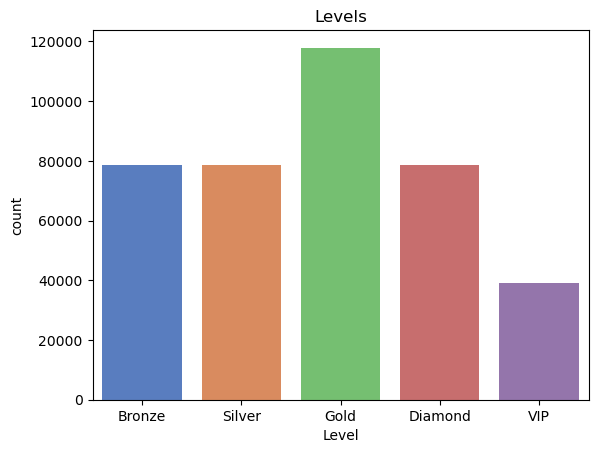

In [33]:
sns.countplot(x='Level', data=ci_rfm_df, palette='muted', order=order)
plt.title('Levels')
plt.show()

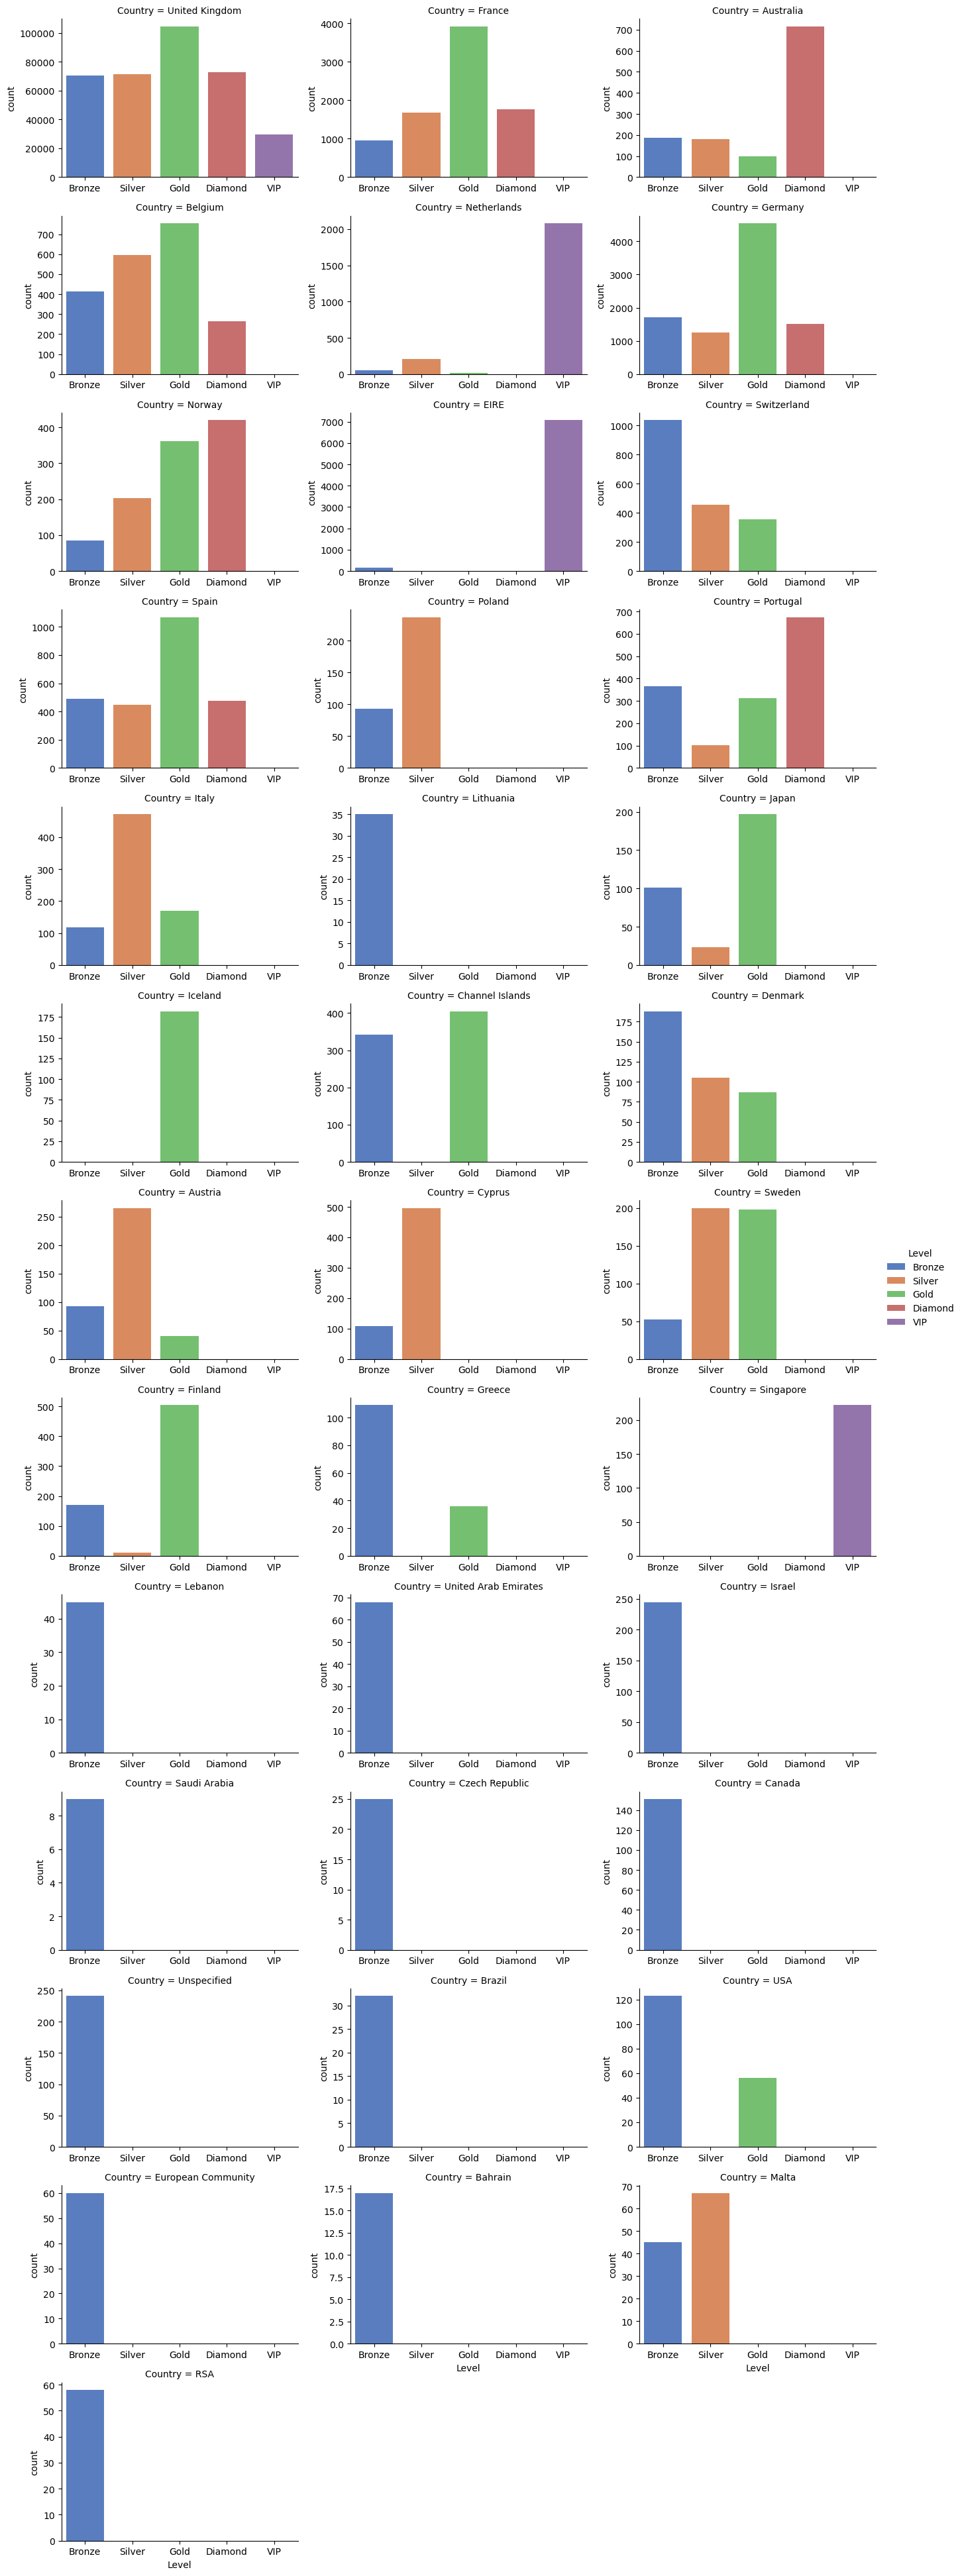

In [34]:
order_columbs=['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

g = sns.FacetGrid(
    ci_rfm_df, 
    col='Country', 
    col_wrap=3, 
    hue='Level', 
    palette='muted', 
    hue_order=order_columbs, 
    sharex=False, 
    sharey=False,
    aspect=1.5
)

g.map(sns.countplot, 'Level', order=order_columbs)

g.add_legend()

plt.show()

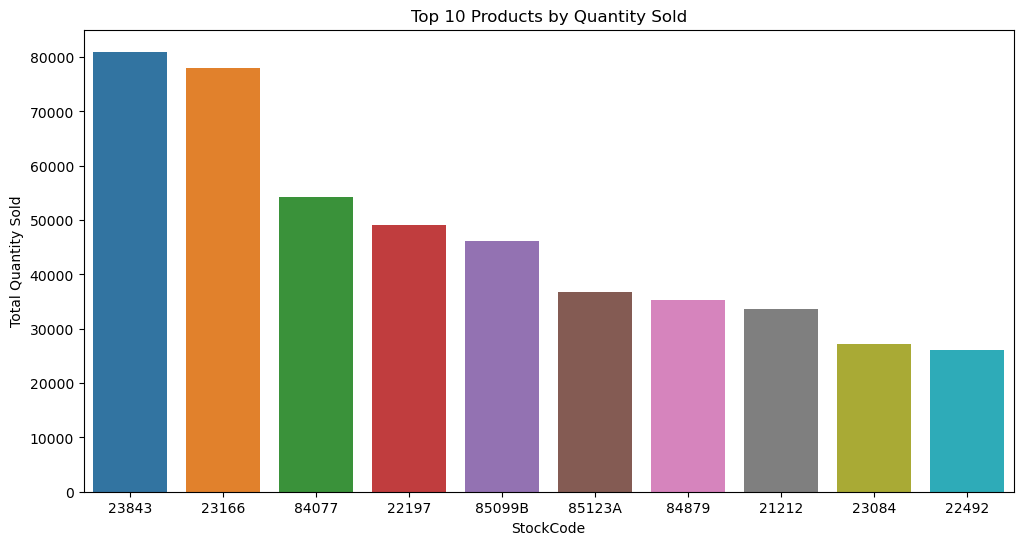

In [35]:
# 각 상품별 판매량이 많은 top10
# 각 상품별 총 판매 수량을 계산
product_sales = ci_rfm_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
# top10 상품만 선택
top_10_products = product_sales.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.show()

In [36]:
median_df = ci_rfm_df.groupby('ProductID')['Price'].median().sort_values(ascending=False)
median_df['23843']

2.08

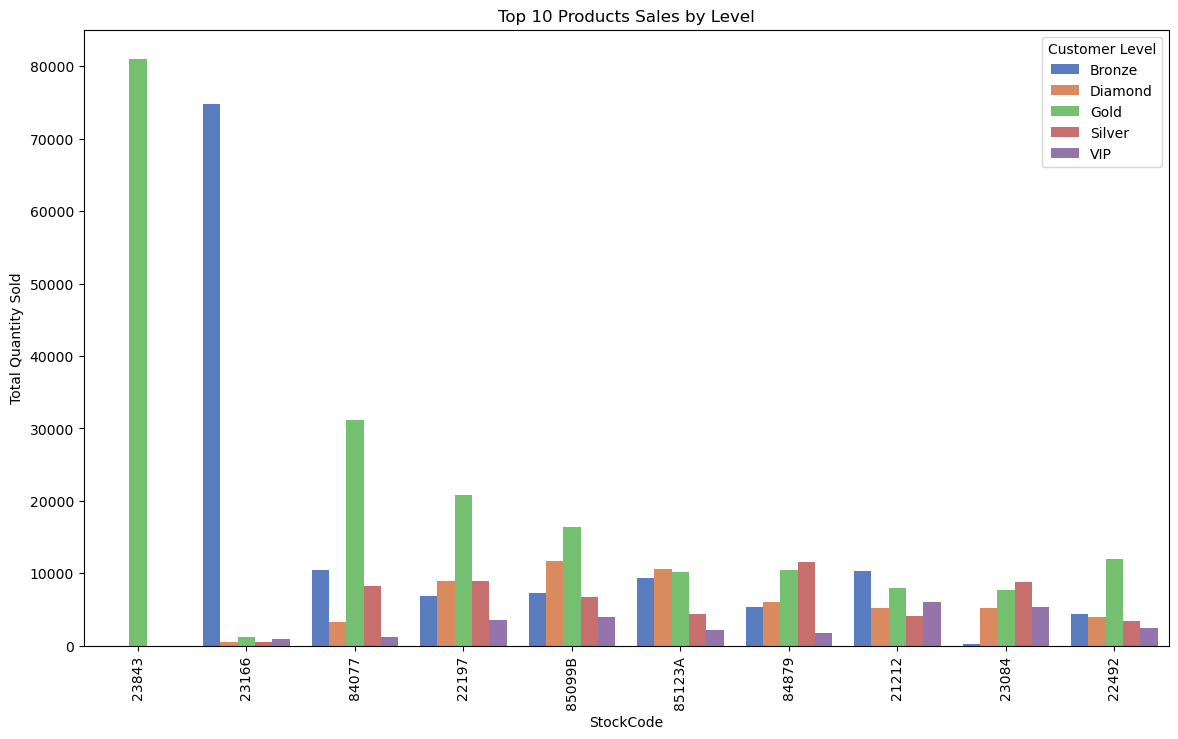

In [37]:
# 각 상품별 구매한 고객의 등급 분포도 시각화
# 판매량 top10의 ProductID를 리스트로 반환
top_10_products = product_sales.head(10).index.tolist()

# 상위 10개 상품에 대한 데이터만 필터링
top_10_df = ci_rfm_df[ci_rfm_df['ProductID'].isin(top_10_products)]

# 각 상품별, 등급별 판매량 집계
product_level_sales = top_10_df.groupby(['ProductID', 'Level'])['Quantity'].sum().reset_index()

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(
    x='ProductID', 
    y='Quantity', 
    hue='Level', 
    data=product_level_sales, 
    order=top_10_products, 
    palette='muted')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products Sales by Level')
plt.legend(title='Customer Level')
plt.xticks(rotation=90)
plt.show()

### 마케팅 전략 제안
- Gold 등급 중심 전략: Gold 등급 고객의 높은 거래 빈도를 바탕으로 등급별 차별화된 혜택 강화

- 지역별 맞춤형 마케팅: 국가별 등급 분포 차이에 주목하여, 각 지역의 문화와 구매 트렌드에 맞는 타깃 마케팅을 실시

- 제품별 타겟 마케팅: 상위 판매 상품에 대한 고객 등급별 선호도를 분석하여, 등급별로 맞춤형 마케팅과 프로모션 기획